# Project in APML

Contributors:

- Bjørn Christian Weinbach
- Emil
- Markus

## Question 3

We have been given on the quiz:

$$
\Sigma_s = 
\begin{bmatrix}
1 & 0 \\
0 & 4
\end{bmatrix}
$$

$$
\mu_s = 
\begin{bmatrix}
1 & -1
\end{bmatrix}^T
$$

and

$$
\Sigma_{t|s} = 5
$$

### Quiz question 1

we use corollary 1 and python to calculate this

## Question 5 A first Gibbs sampler

Want to estimate posterior

$$
p(s_1, s_2|y=1)
$$

And we know that $p(y=1)$ = $p(t>0)$.

so

$$
p(s_1, s_2|t>0)
$$

In [304]:
import numpy as np
import scipy.stats
import matplotlib.pyplot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

L = 10000

# Initial Chain of values
s1 = np.zeros(L)
s2 = np.zeros(L)
t = np.zeros(L)
y = 1
s1[0] = 1
s2[0] = 1
t[0] = 1

# Hyperparameters
sigma_s = np.array([[1, 0], [0, 1]])
mu_s = np.array([1, 1])
sigma_ts = 3

def corr1(sigmaa, A, sigmaba, mua, xb): 
    sigmaab = np.linalg.pinv(np.linalg.pinv(sigmaa) + np.outer(A.T, A)*sigmaba**-1)
    muab = sigmaab@(np.linalg.pinv(sigmaa)@mua + A.T*sigmaba**-1*xb)
    return sigmaab, muab

for l in range(L-1):
    # Sample S
    A = np.array([s1[l], -s2[l]])
    sigma_st, mu_st = corr1(sigma_s, A, sigma_ts, mu_s, t[l])
    s1[l+1], s2[l+1] = scipy.stats.multivariate_normal.rvs(mean=mu_st, cov=sigma_st)

    # Sample T
    smean = s1[l] - s2[l]
    # mismatch
    a_scaled, b_scaled = (0 - (smean)) / sigma_ts, (np.inf - (smean)) / sigma_ts
    # mismatch
    t[l+1] = scipy.stats.truncnorm.rvs(a_scaled, b_scaled, loc=smean, scale=np.sqrt(sigma_ts))

In [293]:
experiment = pd.DataFrame(
    {
        "s1": s1[50:],
        "s2": s2[50:],
        "t": t[50:]
    }
)

<Figure size 1080x1080 with 0 Axes>

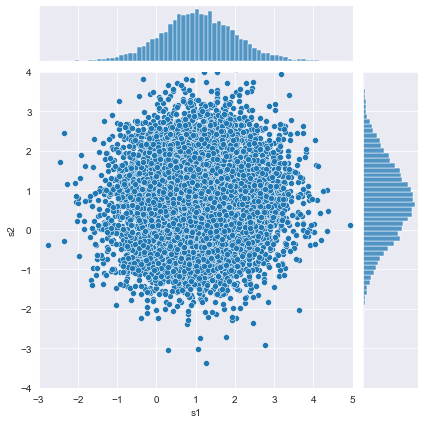

In [294]:
plt.figure(figsize=(15, 15))
sns.set_style("darkgrid")
sns.jointplot(data=experiment, x="s1", y="s2",
              xlim=(-3, 5), ylim=(-4, 4))
plt.savefig("gibbs.png")

<AxesSubplot:xlabel='t', ylabel='Count'>

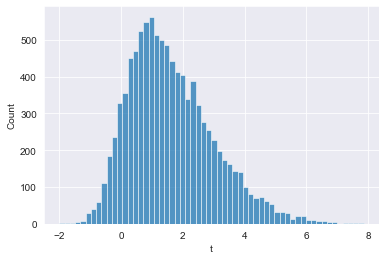

In [298]:
sns.histplot(data=experiment, x="t")